# seagliderOG1 demo

The purpose of this notebook is to demonstrate the functionality of `seagliderOG1` to convert from Seaglider basestation files to OG1 format.

- OG1 format is a newly agreed format (since June 2024) for glider data sets from various platforms (e.g., Seaglider, Slocum, Seaexplorer).  It lives on github here: (https://github.com/OceanGlidersCommunity/OG-format-user-manual).
- OG1 manual: https://oceangliderscommunity.github.io/OG-format-user-manual/OG_Format.html

The test case is to convert sg015 data from the Labrador Sea in September 2004.

The demo is organised to show

- Conversion of a single dive cycle (single `p*.nc` file)

- Conversion for a folder of local dive-cycle files (full mission of `p*.nc` files)

- Download from remote server + conversion (directory with full mission of `p*.nc` files)

Options are provided to only load e.g. 10 files, but note that OG1 format expects a full mission.


In [1]:
import pathlib
import sys

script_dir = pathlib.Path().parent.absolute()
parent_dir = script_dir.parents[0]
sys.path.append(str(parent_dir))
sys.path.append(str(parent_dir) + '/seagliderOG1')
print(parent_dir)
print(sys.path)

import xarray as xr
import os
from seagliderOG1 import readers, writers, plotters
from seagliderOG1 import convertOG1, vocabularies


/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1
['/Users/eddifying/micromamba/envs/messfern_env/lib/python313.zip', '/Users/eddifying/micromamba/envs/messfern_env/lib/python3.13', '/Users/eddifying/micromamba/envs/messfern_env/lib/python3.13/lib-dynload', '', '/Users/eddifying/venv/lib/python3.13/site-packages', '/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1', '/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1']


In [2]:
# Specify the path for writing datafiles
data_path = os.path.join(parent_dir, 'data')

## Reading basestation files

This has three ways to load a glider dataset.

Load an example dataset using `seagliderOG1.fetchers.load_sample_dataset`

Alternatively, use your own with e.g. `ds = xr.open_dataset('/path/to/yourfile.nc')`

### Load single sample dataset

In [3]:
ds = readers.load_sample_dataset()
ds

<xarray.Dataset> Size: 580kB
Dimensions:                       (sg_data_point: 1369, trajectory: 1,
                                   gps_info: 3, gc_event: 110)
Coordinates:
  * trajectory                    (trajectory) int32 4B 34
    longitude                     (sg_data_point) float64 11kB ...
    latitude                      (sg_data_point) float64 11kB ...
    ctd_time                      (sg_data_point) datetime64[ns] 11kB ...
    ctd_depth                     (sg_data_point) float64 11kB ...
Dimensions without coordinates: sg_data_point, gps_info, gc_event
Data variables: (12/216)
    surface_curr_north            float64 8B ...
    surface_curr_east             float64 8B ...
    start_of_climb_time           timedelta64[ns] 8B ...
    sg_cal_volmax                 float64 8B ...
    sg_cal_vbd_min_cnts           int32 4B ...
    sg_cal_vbd_max_cnts           int32 4B ...
    ...                            ...
    conductivity                  (sg_data_point) float64 11kB ...
    buoyancy                      (sg_data_point) float64 11kB ...
    GPSE_qc                       |S1 1B ...
    GPS2_qc                       |S1 1B ...
    GPS1_qc                       |S1 1B ...
    CTD_qc                        |S1 1B ...
Attributes: (12/58)
    quality_control_version:         1.1
    base_station_micro_version:      3705
    time_coverage_resolution:        PT1S
    geospatial_vertical_max:         987.8412351247141
    sea_name:                        Labrador Sea
    mission:                         1
    ...                              ...
    disclaimer:                      Data has not been reviewed and is provid...
    geospatial_vertical_positive:    no
    date_created:                    2013-08-01T03:08:39Z
    geospatial_vertical_units:       meter
    dive_number:                     34
    history:                         Processing start:\n03:41:38 01 Aug 2013 ...

### Load datasets from a local directory

In [4]:
# Specify the input directory on your local machine
input_dir = "/Users/eddifying/Dropbox/data/sg015-ncei-download"

# Load and concatenate all datasets in the input directory
# Optionally, specify the range of profiles to load (start_profile, end_profile)
list_datasets = readers.read_basestation(input_dir, start_profile=500, end_profile=503)

# Where list_datasets is a list of xarray datasets.  A single dataset can be accessed as
ds = list_datasets[0]

In [5]:
ds

<xarray.Dataset> Size: 570kB
Dimensions:                       (sg_data_point: 1338, trajectory: 1,
                                   gps_info: 3, gc_event: 148)
Coordinates:
  * trajectory                    (trajectory) int32 4B 503
    longitude                     (sg_data_point) float64 11kB ...
    latitude                      (sg_data_point) float64 11kB ...
    ctd_time                      (sg_data_point) datetime64[ns] 11kB ...
    ctd_depth                     (sg_data_point) float64 11kB ...
Dimensions without coordinates: sg_data_point, gps_info, gc_event
Data variables: (12/226)
    surface_curr_north            float64 8B ...
    surface_curr_east             float64 8B ...
    start_of_climb_time           timedelta64[ns] 8B ...
    sg_cal_volmax                 float64 8B ...
    sg_cal_vbd_min_cnts           int32 4B ...
    sg_cal_vbd_max_cnts           int32 4B ...
    ...                            ...
    conductivity                  (sg_data_point) float64 11kB ...
    buoyancy                      (sg_data_point) float64 11kB ...
    GPSE_qc                       |S1 1B ...
    GPS2_qc                       |S1 1B ...
    GPS1_qc                       |S1 1B ...
    CTD_qc                        |S1 1B ...
Attributes: (12/58)
    quality_control_version:         1.1
    base_station_micro_version:      3705
    time_coverage_resolution:        PT1S
    geospatial_vertical_max:         984.1416311048997
    sea_name:                        Labrador Sea
    mission:                         1
    ...                              ...
    disclaimer:                      Data has not been reviewed and is provid...
    geospatial_vertical_positive:    no
    date_created:                    2013-08-01T05:08:02Z
    geospatial_vertical_units:       meter
    dive_number:                     503
    history:                         Processing start:\n05:52:59 01 Aug 2013 ...

### Load datasets from a remote directory (URL)

In [6]:
# Specify the server where data are located
server = "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/015/20040924/"

# Load and concatenate all datasets from the server, optionally specifying the range of profiles to load
list_datasets = readers.read_basestation(server, start_profile=500, end_profile=503)

## Convert to OG1 format

Process:

1. For one basestation dataset, split the dataset by dimension (`split_ds`)
3. Transform into OG1 format: dataset with dims `sg_data_point`
    - Change the dimension to `N_MEASUREMENTS`
    - Rename variables according to `vocabularies.standard_names` 
    - Assign variable attributes according to `vocabularies.vocab_attrs`.  (Note: This *could* go wrong since it makes assumptions about the input variables. May need additional handling.)
4. Add missing mandatory variables: 
    - From `split_ds[(gps_info,)]`, add the `LATITUDE_GPS`, `LONGITUDE_GPS` and `TIME_GPS` (Note: presently `TIME_GPS` is stripped before saving, but `TIME` values contain `TIME_GPS`)
    - Create `PROFILE_NUMBER` and `PHASE`
    - Calculate `DEPTH_Z` which is positive up
5. Update attributes for the file. 
    - Combines `creator` and `contributor` from original attributes into `contributor`
    - Adds `contributing_institutions` based on `institution`
    - Reformats time in `time_coverage_*` and `start_time`--> `start_date`
    - Adds `date_modified`
    - Renames `comments`-->`history`, `site`-->`summary`
    - Adds `title`, `platform`, `platform_vocabulary`, `featureType`, `Conventions`, `rtqc_method*` according to OceanGliders format
    - Retains `naming_authority`, `institution`, `project`, `geospatial_*` as OG attributes
    - Retains extra attributes: `license`, `keywords`, `keywords_vocabulary`, `file_version`, `acknowledgement`, `date_created`, `disclaimer`

Future behaviour to be added:

6. Retain the variables starting with `sg_cal` and check whether they vary over the mission (shouldn't)
6. Add sensors, using information in the `split_ds` with no dimensions
    - Need (from sg_cal_constants: `sg_cal` plus `volmax`, `vbd_cnts_per_cc`, `therm_expan`, `t_*`, `mass`, `hd_*`, `ctcor`, `cpcor`, `c_*`, `abs_compress`, `a`, `Tcor`, `Soc`, `Pcor`, `Foffset`)
    - Maybe also `reviewed`, `magnetic_variation` (which will change with position), `log_D_FLARE`, `flight_avg_speed_north` and `flight_avg_speed_east` also with `_gsm`, `depth_avg_curr_north` and `depth_avg_curr_east` also with `_gsm`, 
    `wlbb2f` - means sensor
    `sg_cal_mission_title`
    `sg_cal_id_str`
    `calibcomm_oxygen`
    `calibcomm`
    `sbe41` means ??
    `hdm_qc`
    `glider`
    
### Convert a single (sample) dataset

Variable 'vert_speed_gsm' not in OG1 vocabulary.


Variable 'time' not in OG1 vocabulary.


Variable 'speed_gsm' not in OG1 vocabulary.


Variable 'sound_velocity' not in OG1 vocabulary.


Variable 'north_displacement_gsm' not in OG1 vocabulary.


Variable 'longitude_gsm' not in OG1 vocabulary.


Variable 'latitude_gsm' not in OG1 vocabulary.


Variable 'horz_speed_gsm' not in OG1 vocabulary.


Variable 'glide_angle_gsm' not in OG1 vocabulary.


Variable 'eng_wlbb2f_VFtemp' not in OG1 vocabulary.


Variable 'eng_sbect_tempFreq' not in OG1 vocabulary.


Variable 'eng_sbect_condFreq' not in OG1 vocabulary.


Variable 'eng_elaps_t_0000' not in OG1 vocabulary.


Variable 'eng_elaps_t' not in OG1 vocabulary.


Variable 'eng_depth' not in OG1 vocabulary.


Variable 'east_displacement_gsm' not in OG1 vocabulary.


Variable 'depth' not in OG1 vocabulary.


Variable 'density' not in OG1 vocabulary.


Variable 'buoyancy' not in OG1 vocabulary.


No conversion information found for cm s-1 to degrees
No conversion information found for micromoles/kg to percent
wlbb2f
Adding sensor: SENSOR_FLUOROMETERS
sbe41
sbe41
SBE#29613t1/c1 calibration 7 Sep 02
7Sep02
Unknown


/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:359: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  return ds.assign(divenum=('N_MEASUREMENTS', [dive_number] * ds.dims['N_MEASUREMENTS']))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:178: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['dive_num_cast'] = (['N_MEASUREMENTS'], np.full(ds.dims['N_MEASUREMENTS'], np.nan))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:239: FutureWarning: The return type of `Dataset.dims` will be changed to return a 

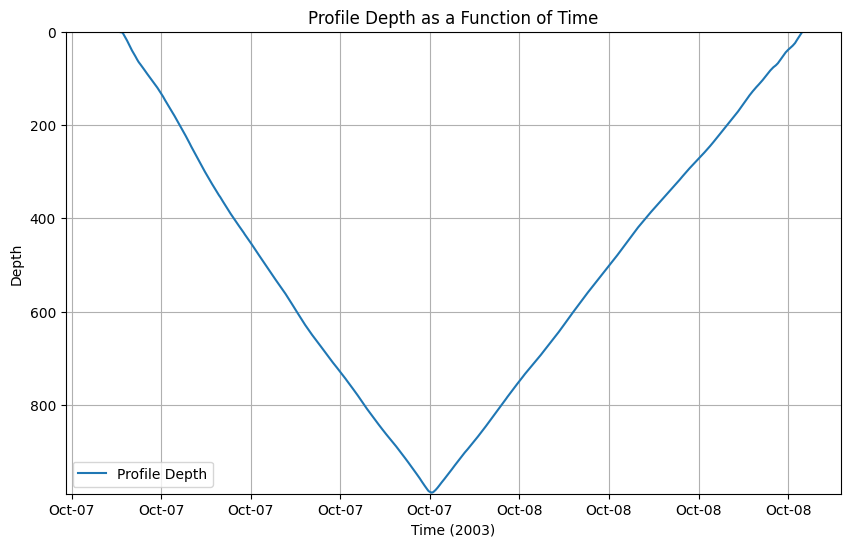

In [7]:
# Loads one dataset (p0150500_20050213.nc)
ds = readers.load_sample_dataset()

ds_OG1 = convertOG1.convert_to_OG1(ds)

# Check the results - uncomment the following lines to either generate a plot or show the variables.
plotters.plot_profile_depth(ds_OG1)

In [8]:
# Print to screen a table of the variables and variable attributes
#plotters.show_attributes(ds_OG1)
ds_OG1

<xarray.Dataset> Size: 351kB
Dimensions:                 (N_MEASUREMENTS: 1372)
Coordinates:
    LONGITUDE               (N_MEASUREMENTS) float64 11kB -55.2 -55.2 ... -55.38
    LATITUDE                (N_MEASUREMENTS) float64 11kB 63.86 63.86 ... 63.88
    TIME                    (N_MEASUREMENTS) datetime64[ns] 11kB 2003-10-07T1...
    DEPTH                   (N_MEASUREMENTS) float64 11kB 0.0 0.0 ... 0.5589 0.0
Dimensions without coordinates: N_MEASUREMENTS
Data variables: (12/49)
    TEMP_RAW_QC             (N_MEASUREMENTS) float32 5kB nan nan 1.0 ... 1.0 nan
    TEMP_QC                 (N_MEASUREMENTS) float32 5kB nan nan 1.0 ... 1.0 nan
    GLIDE_SPEED_QC          (N_MEASUREMENTS) float32 5kB nan nan 4.0 ... 4.0 nan
    PSAL_RAW_QC             (N_MEASUREMENTS) float32 5kB nan nan 1.0 ... 1.0 nan
    PSAL_QC                 (N_MEASUREMENTS) float32 5kB nan nan 4.0 ... 4.0 nan
    CNDC_RAW_QC             (N_MEASUREMENTS) float32 5kB nan nan 1.0 ... 1.0 nan
    ...                      ...
    PHASE                   (N_MEASUREMENTS) float64 11kB 3.0 3.0 ... 1.0 1.0
    PHASE_QC                (N_MEASUREMENTS) int64 11kB 0 0 0 0 0 ... 0 0 0 0 0
    DEPTH_Z                 (N_MEASUREMENTS) float64 11kB nan nan ... nan
    SENSOR_FLUOROMETERS     (N_MEASUREMENTS) float64 11kB nan nan ... nan nan
    SENSOR_CTD_UNKNOWN      (N_MEASUREMENTS) float64 11kB nan nan ... nan nan
    PLATFORM_SERIAL_NUMBER  <U5 20B 'sg004'
Attributes: (12/39)
    title:                                      OceanGliders trajectory file
    id:                                         sg004_20031007T193208_delayed
    platform:                                   sub-surface gliders
    platform_vocabulary:                        https://vocab.nerc.ac.uk/coll...
    naming_authority:                           edu.washington.apl
    institution:                                School of Oceanography\nUnive...
    ...                                         ...
    keywords_vocabulary:                        NASA/GCMD Earth Science Keywo...
    keywords:                                   Water Temperature, Conductivi...
    license:                                    These data may be redistribut...
    acknowledgment:                             NOAA Office of Arctic Researc...
    file_version:                               2.71
    disclaimer:                                 Data has not been reviewed an...

### Convert mission from a local directory of basestation files

- For local data in the directory `input_dir`
- Creates a plot of ctd_depth against ctd_time.


Variable 'vert_speed_gsm' not in OG1 vocabulary.


Variable 'time' not in OG1 vocabulary.


Variable 'speed_gsm' not in OG1 vocabulary.


Variable 'sound_velocity' not in OG1 vocabulary.


Variable 'north_displacement_gsm' not in OG1 vocabulary.


Variable 'longitude_gsm' not in OG1 vocabulary.


Variable 'latitude_gsm' not in OG1 vocabulary.


Variable 'horz_speed_gsm' not in OG1 vocabulary.


Variable 'glide_angle_gsm' not in OG1 vocabulary.


Variable 'eng_wlbb2f_VFtemp' not in OG1 vocabulary.


Variable 'eng_sbect_tempFreq' not in OG1 vocabulary.


Variable 'eng_sbect_condFreq' not in OG1 vocabulary.


Variable 'eng_elaps_t_0000' not in OG1 vocabulary.


Variable 'eng_elaps_t' not in OG1 vocabulary.


Variable 'eng_depth' not in OG1 vocabulary.


Variable 'east_displacement_gsm' not in OG1 vocabulary.


Variable 'depth' not in OG1 vocabulary.


Variable 'density' not in OG1 vocabulary.


Variable 'buoyancy' not in OG1 vocabulary.


/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:359: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  return ds.assign(divenum=('N_MEASUREMENTS', [dive_number] * ds.dims['N_MEASUREMENTS']))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:178: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['dive_num_cast'] = (['N_MEASUREMENTS'], np.full(ds.dims['N_MEASUREMENTS'], np.nan))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:239: FutureWarning: The return type of `Dataset.dims` will be changed to return a 

Variable 'time' not in OG1 vocabulary.


Variable 'speed_gsm' not in OG1 vocabulary.


Variable 'sound_velocity' not in OG1 vocabulary.


Variable 'north_displacement_gsm' not in OG1 vocabulary.


Variable 'longitude_gsm' not in OG1 vocabulary.


Variable 'latitude_gsm' not in OG1 vocabulary.


Variable 'horz_speed_gsm' not in OG1 vocabulary.


Variable 'glide_angle_gsm' not in OG1 vocabulary.


Variable 'eng_wlbb2f_VFtemp' not in OG1 vocabulary.


Variable 'eng_sbect_tempFreq' not in OG1 vocabulary.


Variable 'eng_sbect_condFreq' not in OG1 vocabulary.


Variable 'eng_elaps_t_0000' not in OG1 vocabulary.


Variable 'eng_elaps_t' not in OG1 vocabulary.


Variable 'eng_depth' not in OG1 vocabulary.


Variable 'east_displacement_gsm' not in OG1 vocabulary.


Variable 'depth' not in OG1 vocabulary.


Variable 'density' not in OG1 vocabulary.


Variable 'buoyancy' not in OG1 vocabulary.


/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:359: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  return ds.assign(divenum=('N_MEASUREMENTS', [dive_number] * ds.dims['N_MEASUREMENTS']))


/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:178: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['dive_num_cast'] = (['N_MEASUREMENTS'], np.full(ds.dims['N_MEASUREMENTS'], np.nan))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:239: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['PHASE'] = (['N_MEASUREMENTS'], np.full(ds.dims['N_MEASUREMENTS'], np.nan))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:241: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of di

Variable 'vert_speed_gsm' not in OG1 vocabulary.


No conversion information found for cm s-1 to degrees
No conversion information found for micromoles/kg to percent
wlbb2f
Adding sensor: SENSOR_FLUOROMETERS
sbe41
sbe41
SBE t12/c12 calibration 30DEC03
30DEC03
Unknown
No conversion information found for cm s-1 to degrees
No conversion information found for micromoles/kg to percent
wlbb2f
Adding sensor: SENSOR_FLUOROMETERS
sbe41
sbe41
SBE t12/c12 calibration 30DEC03
30DEC03
Unknown


Variable 'time' not in OG1 vocabulary.


Variable 'speed_gsm' not in OG1 vocabulary.


Variable 'sound_velocity' not in OG1 vocabulary.


Variable 'north_displacement_gsm' not in OG1 vocabulary.


Variable 'longitude_gsm' not in OG1 vocabulary.


Variable 'latitude_gsm' not in OG1 vocabulary.


Variable 'horz_speed_gsm' not in OG1 vocabulary.


Variable 'glide_angle_gsm' not in OG1 vocabulary.


Variable 'eng_wlbb2f_VFtemp' not in OG1 vocabulary.


Variable 'eng_sbect_tempFreq' not in OG1 vocabulary.


Variable 'eng_sbect_condFreq' not in OG1 vocabulary.


Variable 'eng_elaps_t_0000' not in OG1 vocabulary.


Variable 'eng_elaps_t' not in OG1 vocabulary.


Variable 'eng_depth' not in OG1 vocabulary.


Variable 'east_displacement_gsm' not in OG1 vocabulary.


Variable 'depth' not in OG1 vocabulary.


Variable 'density' not in OG1 vocabulary.


Variable 'buoyancy' not in OG1 vocabulary.


/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:359: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  return ds.assign(divenum=('N_MEASUREMENTS', [dive_number] * ds.dims['N_MEASUREMENTS']))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:178: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['dive_num_cast'] = (['N_MEASUREMENTS'], np.full(ds.dims['N_MEASUREMENTS'], np.nan))


/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:239: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['PHASE'] = (['N_MEASUREMENTS'], np.full(ds.dims['N_MEASUREMENTS'], np.nan))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:241: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['PHASE_QC'] = (['N_MEASUREMENTS'], np.zeros(ds.dims['N_MEASUREMENTS'], dtype=int))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:292: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dim

Variable 'vert_speed_gsm' not in OG1 vocabulary.


Variable 'time' not in OG1 vocabulary.


Variable 'speed_gsm' not in OG1 vocabulary.


Variable 'sound_velocity' not in OG1 vocabulary.


Variable 'north_displacement_gsm' not in OG1 vocabulary.


Variable 'longitude_gsm' not in OG1 vocabulary.


Variable 'latitude_gsm' not in OG1 vocabulary.


Variable 'horz_speed_gsm' not in OG1 vocabulary.


Variable 'glide_angle_gsm' not in OG1 vocabulary.


Variable 'eng_wlbb2f_VFtemp' not in OG1 vocabulary.


Variable 'eng_sbect_tempFreq' not in OG1 vocabulary.


Variable 'eng_sbect_condFreq' not in OG1 vocabulary.


Variable 'eng_elaps_t_0000' not in OG1 vocabulary.


Variable 'eng_elaps_t' not in OG1 vocabulary.


Variable 'eng_depth' not in OG1 vocabulary.


Variable 'east_displacement_gsm' not in OG1 vocabulary.


Variable 'depth' not in OG1 vocabulary.


Variable 'density' not in OG1 vocabulary.


Variable 'buoyancy' not in OG1 vocabulary.


/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:359: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  return ds.assign(divenum=('N_MEASUREMENTS', [dive_number] * ds.dims['N_MEASUREMENTS']))


/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:178: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['dive_num_cast'] = (['N_MEASUREMENTS'], np.full(ds.dims['N_MEASUREMENTS'], np.nan))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:239: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['PHASE'] = (['N_MEASUREMENTS'], np.full(ds.dims['N_MEASUREMENTS'], np.nan))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:241: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of di

No conversion information found for cm s-1 to degrees
No conversion information found for micromoles/kg to percent
wlbb2f
Adding sensor: SENSOR_FLUOROMETERS
sbe41
sbe41
SBE t12/c12 calibration 30DEC03
30DEC03
Unknown
No conversion information found for cm s-1 to degrees
No conversion information found for micromoles/kg to percent
wlbb2f
Adding sensor: SENSOR_FLUOROMETERS
sbe41
sbe41
SBE t12/c12 calibration 30DEC03
30DEC03
Unknown


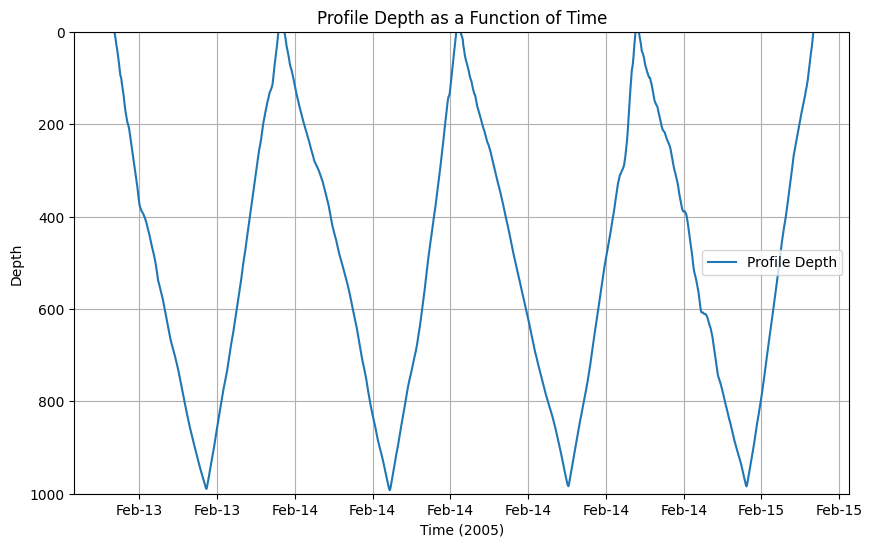

In [9]:
# Specify the input directory on your local machine
input_dir = "/Users/eddifying/Dropbox/data/sg015-ncei-download"

# Load and concatenate all datasets in the input directory
# Optionally, specify the range of profiles to load (start_profile, end_profile)
list_datasets = readers.read_basestation(input_dir, start_profile=500, end_profile=503)

# Convert the list of datasets to OG1
ds_OG1 = convertOG1.convert_to_OG1(list_datasets)

# Generate a simple plot
plotters.plot_profile_depth(ds_OG1)
#plotters.show_contents(ds_all,'attrs')

### Convert mission from the NCEI server (with p*nc files)

- Data from the sg015 mission in the Labrador Sea (https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.nodc:0111844), dataset identifier gov.noaa.nodc:0111844.


In [10]:
# Specify the server where data are located
server = "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/015/20040924/"

# Load and concatenate all datasets from the server, optionally specifying the range of profiles to load
list_datasets = readers.read_basestation(server, start_profile=500, end_profile=503)

# Convert the list of datasets to OG1
ds_OG1 = convertOG1.convert_to_OG1(list_datasets)

Variable 'vert_speed_gsm' not in OG1 vocabulary.


Variable 'time' not in OG1 vocabulary.


Variable 'speed_gsm' not in OG1 vocabulary.


Variable 'sound_velocity' not in OG1 vocabulary.


Variable 'north_displacement_gsm' not in OG1 vocabulary.


Variable 'longitude_gsm' not in OG1 vocabulary.


Variable 'latitude_gsm' not in OG1 vocabulary.


Variable 'horz_speed_gsm' not in OG1 vocabulary.


Variable 'glide_angle_gsm' not in OG1 vocabulary.


Variable 'eng_wlbb2f_VFtemp' not in OG1 vocabulary.


Variable 'eng_sbect_tempFreq' not in OG1 vocabulary.


Variable 'eng_sbect_condFreq' not in OG1 vocabulary.


Variable 'eng_elaps_t_0000' not in OG1 vocabulary.


Variable 'eng_elaps_t' not in OG1 vocabulary.


Variable 'eng_depth' not in OG1 vocabulary.


Variable 'east_displacement_gsm' not in OG1 vocabulary.


Variable 'depth' not in OG1 vocabulary.


Variable 'density' not in OG1 vocabulary.


Variable 'buoyancy' not in OG1 vocabulary.


/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:359: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  return ds.assign(divenum=('N_MEASUREMENTS', [dive_number] * ds.dims['N_MEASUREMENTS']))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:178: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['dive_num_cast'] = (['N_MEASUREMENTS'], np.full(ds.dims['N_MEASUREMENTS'], np.nan))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:239: FutureWarning: The return type of `Dataset.dims` will be changed to return a 

Variable 'time' not in OG1 vocabulary.


Variable 'speed_gsm' not in OG1 vocabulary.


Variable 'sound_velocity' not in OG1 vocabulary.


Variable 'north_displacement_gsm' not in OG1 vocabulary.


Variable 'longitude_gsm' not in OG1 vocabulary.


Variable 'latitude_gsm' not in OG1 vocabulary.


Variable 'horz_speed_gsm' not in OG1 vocabulary.


Variable 'glide_angle_gsm' not in OG1 vocabulary.


Variable 'eng_wlbb2f_VFtemp' not in OG1 vocabulary.


Variable 'eng_sbect_tempFreq' not in OG1 vocabulary.


Variable 'eng_sbect_condFreq' not in OG1 vocabulary.


Variable 'eng_elaps_t_0000' not in OG1 vocabulary.


Variable 'eng_elaps_t' not in OG1 vocabulary.


Variable 'eng_depth' not in OG1 vocabulary.


Variable 'east_displacement_gsm' not in OG1 vocabulary.


Variable 'depth' not in OG1 vocabulary.


Variable 'density' not in OG1 vocabulary.


Variable 'buoyancy' not in OG1 vocabulary.


/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:359: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  return ds.assign(divenum=('N_MEASUREMENTS', [dive_number] * ds.dims['N_MEASUREMENTS']))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:178: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['dive_num_cast'] = (['N_MEASUREMENTS'], np.full(ds.dims['N_MEASUREMENTS'], np.nan))


/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:239: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['PHASE'] = (['N_MEASUREMENTS'], np.full(ds.dims['N_MEASUREMENTS'], np.nan))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:241: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['PHASE_QC'] = (['N_MEASUREMENTS'], np.zeros(ds.dims['N_MEASUREMENTS'], dtype=int))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:292: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dim

Variable 'vert_speed_gsm' not in OG1 vocabulary.


No conversion information found for cm s-1 to degrees
No conversion information found for micromoles/kg to percent
wlbb2f
Adding sensor: SENSOR_FLUOROMETERS
sbe41
sbe41
SBE t12/c12 calibration 30DEC03
30DEC03
Unknown
No conversion information found for cm s-1 to degrees
No conversion information found for micromoles/kg to percent
wlbb2f
Adding sensor: SENSOR_FLUOROMETERS
sbe41
sbe41
SBE t12/c12 calibration 30DEC03
30DEC03
Unknown


Variable 'time' not in OG1 vocabulary.


Variable 'speed_gsm' not in OG1 vocabulary.


Variable 'sound_velocity' not in OG1 vocabulary.


Variable 'north_displacement_gsm' not in OG1 vocabulary.


Variable 'longitude_gsm' not in OG1 vocabulary.


Variable 'latitude_gsm' not in OG1 vocabulary.


Variable 'horz_speed_gsm' not in OG1 vocabulary.


Variable 'glide_angle_gsm' not in OG1 vocabulary.


Variable 'eng_wlbb2f_VFtemp' not in OG1 vocabulary.


Variable 'eng_sbect_tempFreq' not in OG1 vocabulary.


Variable 'eng_sbect_condFreq' not in OG1 vocabulary.


Variable 'eng_elaps_t_0000' not in OG1 vocabulary.


Variable 'eng_elaps_t' not in OG1 vocabulary.


Variable 'eng_depth' not in OG1 vocabulary.


Variable 'east_displacement_gsm' not in OG1 vocabulary.


Variable 'depth' not in OG1 vocabulary.


Variable 'density' not in OG1 vocabulary.


Variable 'buoyancy' not in OG1 vocabulary.


/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:359: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  return ds.assign(divenum=('N_MEASUREMENTS', [dive_number] * ds.dims['N_MEASUREMENTS']))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:178: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['dive_num_cast'] = (['N_MEASUREMENTS'], np.full(ds.dims['N_MEASUREMENTS'], np.nan))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:239: FutureWarning: The return type of `Dataset.dims` will be changed to return a 

Variable 'vert_speed_gsm' not in OG1 vocabulary.


Variable 'time' not in OG1 vocabulary.


Variable 'speed_gsm' not in OG1 vocabulary.


Variable 'sound_velocity' not in OG1 vocabulary.


Variable 'north_displacement_gsm' not in OG1 vocabulary.


Variable 'longitude_gsm' not in OG1 vocabulary.


Variable 'latitude_gsm' not in OG1 vocabulary.


Variable 'horz_speed_gsm' not in OG1 vocabulary.


Variable 'glide_angle_gsm' not in OG1 vocabulary.


Variable 'eng_wlbb2f_VFtemp' not in OG1 vocabulary.


Variable 'eng_sbect_tempFreq' not in OG1 vocabulary.


Variable 'eng_sbect_condFreq' not in OG1 vocabulary.


Variable 'eng_elaps_t_0000' not in OG1 vocabulary.


Variable 'eng_elaps_t' not in OG1 vocabulary.


Variable 'eng_depth' not in OG1 vocabulary.


Variable 'east_displacement_gsm' not in OG1 vocabulary.


Variable 'depth' not in OG1 vocabulary.


Variable 'density' not in OG1 vocabulary.


Variable 'buoyancy' not in OG1 vocabulary.


/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:359: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  return ds.assign(divenum=('N_MEASUREMENTS', [dive_number] * ds.dims['N_MEASUREMENTS']))


/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:178: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['dive_num_cast'] = (['N_MEASUREMENTS'], np.full(ds.dims['N_MEASUREMENTS'], np.nan))


/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:239: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['PHASE'] = (['N_MEASUREMENTS'], np.full(ds.dims['N_MEASUREMENTS'], np.nan))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:241: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['PHASE_QC'] = (['N_MEASUREMENTS'], np.zeros(ds.dims['N_MEASUREMENTS'], dtype=int))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:292: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dim

No conversion information found for cm s-1 to degrees
No conversion information found for micromoles/kg to percent
wlbb2f
Adding sensor: SENSOR_FLUOROMETERS
sbe41
sbe41
SBE t12/c12 calibration 30DEC03
30DEC03
Unknown
No conversion information found for cm s-1 to degrees
No conversion information found for micromoles/kg to percent
wlbb2f
Adding sensor: SENSOR_FLUOROMETERS
sbe41
sbe41
SBE t12/c12 calibration 30DEC03
30DEC03
Unknown


## Saving data

Due to problems with writing `xarray` datasets as netCDF when attributes are not of a specified type (`str`, `Number`, `np.ndarray`, `np.number`, `list`, `tuple`), a function was written `save_dataset`.

In [11]:
# Write the file
# This writer catches errors in data types (DType errors) when using xr.to_netcdf()
# The solution is to convert them to strings, which may be undesired behaviour
output_file = os.path.join(data_path, 'demo_test.nc')
if os.path.exists(output_file):
    os.remove(output_file)

writers.save_dataset(ds_OG1, output_file);

TypeError Invalid value for attr 'calibration_parameters': {'t_g': 0.00431040083, 't_h': 0.000631750336, 't_i': 2.27137914e-05, 't_j': 2.20168797e-06, 'c_g': -10.2690994, 'c_h': 1.1547191, 'c_i': -0.00143967206, 'c_j': 0.000204972837, 'cpcor': -9.57e-08, 'ctcor': 3.25e-06}. For serialization to netCDF files, its value must be of one of the following types: str, Number, ndarray, number, list, tuple, bytes
variable 'SENSOR_CTD_UNKNOWN': Converting attribute 'calibration_parameters' with value '{'t_g': 0.00431040083, 't_h': 0.000631750336, 't_i': 2.27137914e-05, 't_j': 2.20168797e-06, 'c_g': -10.2690994, 'c_h': 1.1547191, 'c_i': -0.00143967206, 'c_j': 0.000204972837, 'cpcor': -9.57e-08, 'ctcor': 3.25e-06}' to string.


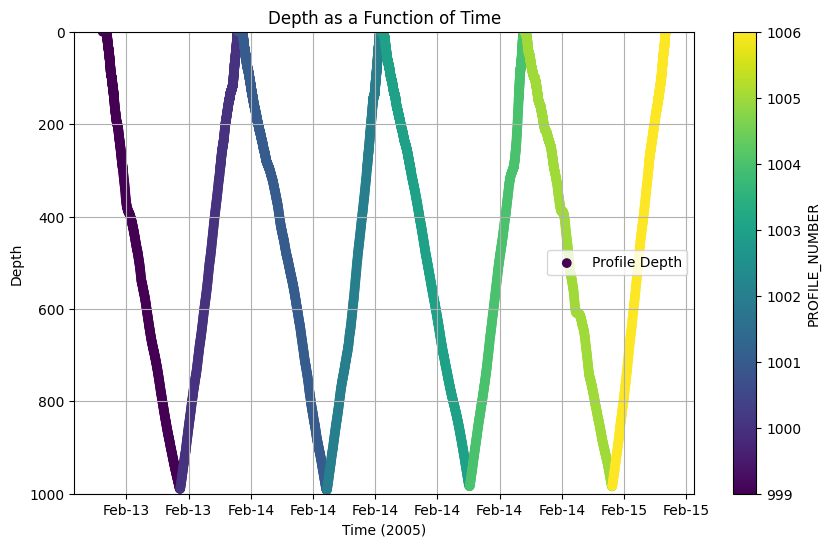

In [12]:
# Load the data saved
ds1 = xr.open_dataset(output_file)

# Generate a simple plot
#plotters.show_contents(ds_all,'attrs')
plotters.plot_depth_colored(ds1, color_by='PROFILE_NUMBER')


## Run multiple missions

In [13]:
# Add these to existing attributes - update to your details
contrib_to_append = vocabularies.contrib_to_append
print(contrib_to_append)

{'contributor_name': 'Eleanor Frajka-Williams', 'contributor_email': 'eleanorfrajka@gmail.com', 'contributor_role': 'Data scientist', 'contributor_role_vocabulary': 'http://vocab.nerc.ac.uk/search_nvs/W08', 'contributing_institutions': 'University of Hamburg - Institute of Oceanography', 'contributing_institutions_vocabulary': 'https://edmo.seadatanet.org/report/1156', 'contributing_institutions_role': 'Data scientist', 'contributing_institutions_role_vocabulary': 'http://vocab.nerc.ac.uk/search_nvs/W08'}


In [14]:
# Specify a list of servers or local directories
input_locations = [
    # Either Iceland, Faroes or RAPID/MOCHA
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/005/20090829/", # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/005/20080606/", # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/005/20081106/", # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/012/20070831/", # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/014/20080214/",  # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/014/20080222/", # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/016/20061112/",  # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/016/20090605/", # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/016/20071113/", # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/016/20080607/",  # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/033/20100518/", # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/033/20100903/", # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/101/20081108/",     # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/101/20061112/",    # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/101/20070609/",   # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/102/20061112/",  # done
    # Labrador Sea
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/015/20040924/",
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/014/20040924/",
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/008/20031002/",
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/004/20031002/",
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/016/20050406/",
    # RAPID/MOCHA
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/033/20100729/",
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/034/20110128/",
]

for input_loc in input_locations:
    # Example usage
    ds_all = convertOG1.process_and_save_data(input_loc, output_dir=data_path, save=True,  run_quietly=True)

Variable 'vert_speed_gsm' not in OG1 vocabulary.


Variable 'time' not in OG1 vocabulary.


Variable 'speed_gsm' not in OG1 vocabulary.


Variable 'sound_velocity' not in OG1 vocabulary.


Variable 'north_displacement_gsm' not in OG1 vocabulary.


Variable 'longitude_gsm' not in OG1 vocabulary.


Variable 'latitude_gsm' not in OG1 vocabulary.


Variable 'horz_speed_gsm' not in OG1 vocabulary.


Variable 'glide_angle_gsm' not in OG1 vocabulary.


Variable 'eng_wlbb2f_VFtemp' not in OG1 vocabulary.


Variable 'eng_sbect_tempFreq' not in OG1 vocabulary.


Variable 'eng_sbect_condFreq' not in OG1 vocabulary.


Variable 'eng_elaps_t_0000' not in OG1 vocabulary.


Variable 'eng_elaps_t' not in OG1 vocabulary.


Variable 'eng_depth' not in OG1 vocabulary.


Variable 'east_displacement_gsm' not in OG1 vocabulary.


Variable 'depth' not in OG1 vocabulary.


Variable 'density' not in OG1 vocabulary.


Variable 'buoyancy' not in OG1 vocabulary.


No conversion information found for cm s-1 to degrees
No conversion information found for micromoles/kg to percent
wlbb2f
Adding sensor: SENSOR_FLUOROMETERS
sbe41
sbe41
SBE t10/c10 calibration 12DEC03
12DEC03
Unknown
File /Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/data/sg014_20050429T043028_delayed.nc already exists. Exiting the process.


/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:359: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  return ds.assign(divenum=('N_MEASUREMENTS', [dive_number] * ds.dims['N_MEASUREMENTS']))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:178: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['dive_num_cast'] = (['N_MEASUREMENTS'], np.full(ds.dims['N_MEASUREMENTS'], np.nan))
/Users/eddifying/Cloudfree/gitlab-cloudfree/seagliderOG1/seagliderOG1/tools.py:239: FutureWarning: The return type of `Dataset.dims` will be changed to return a 